<a href="https://colab.research.google.com/github/tanzeyl/Self-Study/blob/main/MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

d = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mnist_train.csv")
d.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
l = d["label"]
d = d.drop("label", axis=1)

In [3]:
print(d.shape, l.shape)

(42000, 784) (42000,)


1


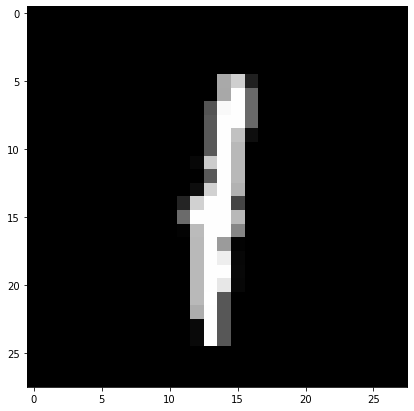

In [4]:
plt.figure(figsize=(7,7))
idx=12
grid = d.iloc[idx].values.reshape(28,28)
plt.imshow(grid, interpolation="none", cmap="gray")
print(l[idx])

# PCA

In [5]:
labels = l.head(15000)
data = d.head(15000)
print("The shape of sample data is = ",data.shape)

The shape of sample data is =  (15000, 784)


In [6]:
#Column Standardization
from sklearn.preprocessing import StandardScaler
s_data = StandardScaler().fit_transform(data)
print(s_data.shape)

(15000, 784)


In [7]:
 #Co-variance matrix
 sample_data = s_data
 c_matrix = np.matmul(sample_data.T, sample_data)
 print(c_matrix.shape)

(784, 784)


In [8]:
#finding top 2 eigen vectors
from scipy.linalg import eigh
values, vectors = eigh(c_matrix, eigvals=(782,783))
print("Shape of Eigen vectors:",vectors.shape)
vectors = vectors.T
print("New shape:",vectors.shape)

Shape of Eigen vectors: (784, 2)
New shape: (2, 784)


In [9]:
#Projecting originl data sample on the plane
import matplotlib.pyplot as plt
new_c = np.matmul(vectors, sample_data.T)
print("Resultant new data shape:", vectors.shape, "X", sample_data.T.shape, "=", new_c.shape)

Resultant new data shape: (2, 784) X (784, 15000) = (2, 15000)


In [10]:
import pandas as pd
#appending label to the 2D projected data
new_c = np.vstack((new_c, labels)).T
#new data frame for plotting the data
data_frame = pd.DataFrame(data=new_c, columns=("1st_principal", "2nd_principal", "label"))
data_frame.head()

,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


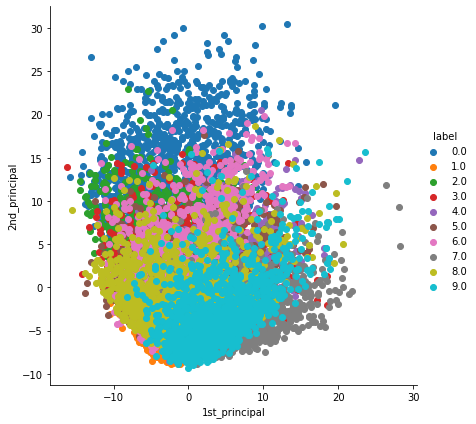

In [11]:
import seaborn as sns
sns.FacetGrid(data_frame, hue="label", size=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()

# PCA using Scikit-Learn

In [12]:
from sklearn import decomposition
pca = decomposition.PCA()

In [13]:
#configuring parameters and number of parameters(features) = 2
pca.n_components = 2
pca_data = pca.fit_transform(data_frame)
#pca reduced will contain 2D projects of simple data
print("Shape of pca_reduced:",pca_data.shape)

Shape of pca_reduced: (15000, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


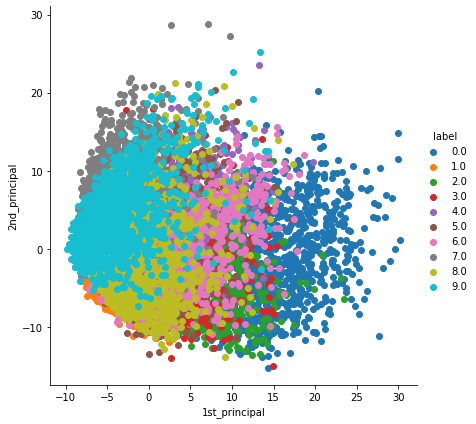

In [14]:
pca_data = np.vstack((pca_data.T, labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()

Text(0, 0.5, 'Cumulative Explained Variance')

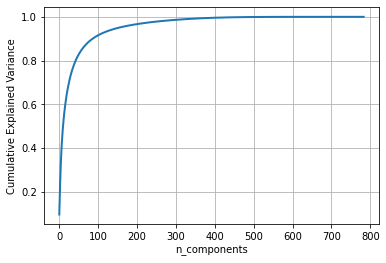

In [15]:
pca.n_components = 784
pca_data = pca.fit_transform(d)
var_exp = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var = np.cumsum(var_exp)
plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cum_var, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cumulative Explained Variance")

# t-SNE using Scikit-Learn

In [16]:
from sklearn.manifold import TSNE
#Pick up top 1000 points as TSNE will take alot of time for 15k points
data_1000 = s_data[0:1000, :]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data_1000)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


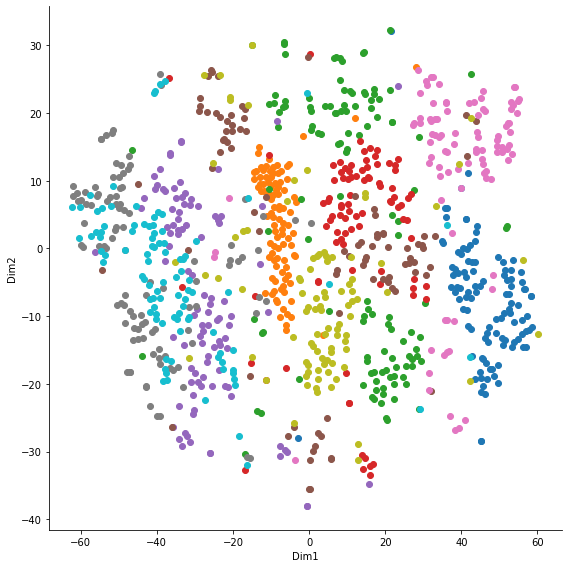

In [17]:
#Creating a new dataframe which will help us in plotting
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "Label"))
sns.FacetGrid(tsne_df, hue="Label", size=8).map(plt.scatter, "Dim1", "Dim2")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'With Perplexity = 50')

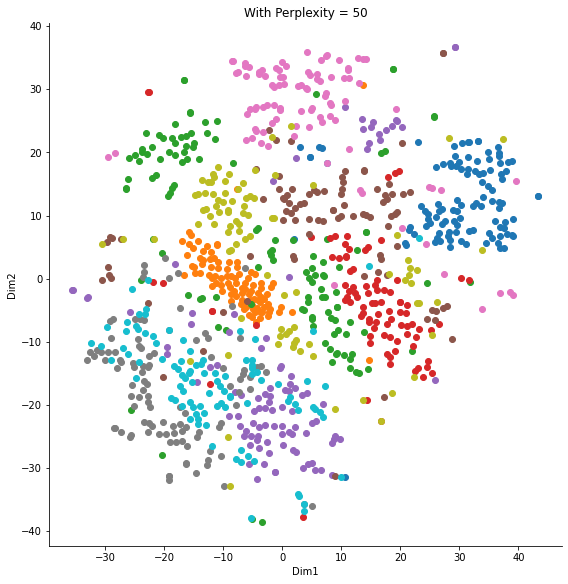

In [20]:
# With perplexity 50
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "Label"))
sns.FacetGrid(tsne_df, hue="Label", size=8).map(plt.scatter, "Dim1", "Dim2")
plt.title("With Perplexity = 50")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'With Perplexity = 50 and Step = 5000')

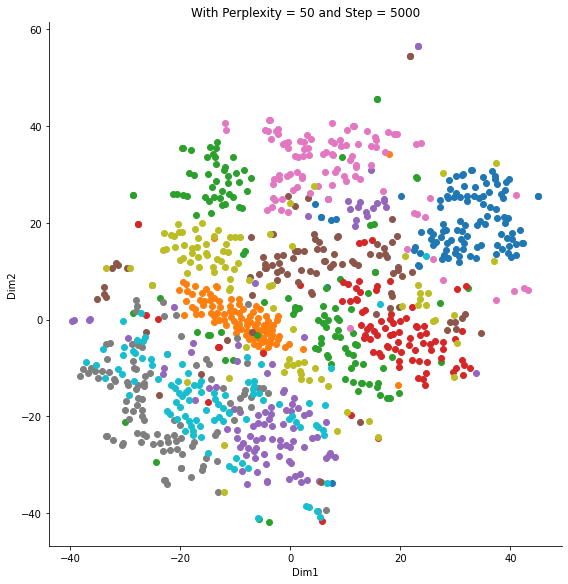

In [21]:
# With perplexity 50 and step = 5000
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "Label"))
sns.FacetGrid(tsne_df, hue="Label", size=8).map(plt.scatter, "Dim1", "Dim2")
plt.title("With Perplexity = 50 and Step = 5000")